In [7]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from utilsPCA import *
from plotting import *
from efficiency import *

import matplotlib as mpl

mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('axes', labelsize=16, titlesize=20)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [8]:
C = 29.9792458 #cm/ns

In [55]:
path = '/eos/user/w/wredjeb/HGCAL/TICLv4Linking/Timing/NtuplesTiming/'
#path = '/eos/user/w/wredjeb/HGCAL/TICLv4Linking/Timing/SingleMuon0PU/ntuples_10_600/'
import os
files = os.listdir(path)
#print([f for f in files if ('sys' not in f and 'new_ntuples_15720913_7' not in f)])

In [56]:
file_simtrackstersSC = [path+f+":ticlNtuplizer/simtrackstersSC" for f in files if ('sys' not in f and '15719812' in f)]
file_simtrackstersCP = [path+f+":ticlNtuplizer/simtrackstersCP" for f in files if ('sys' not in f and '15719812' in f)]
file_ETLclusters     = [path+f+":ticlNtuplizer/ETL" for f in files if ('sys' not in f and '15719812' in f)] 
file_tracksters      = [path+f+":ticlNtuplizer/trackstersMerged" for f in files if ('sys' not in f and '15719812' in f)] 
file_clusters        = [path+f+":ticlNtuplizer/clusters" for f in files if ('sys' not in f and '15719812' in f)] 
file_associations    = [path+f+":ticlNtuplizer/associations" for f in files if ('sys' not in f and '15719812' in f)] 
file_candidates      = [path+f+":ticlNtuplizer/candidates" for f in files if ('sys' not in f and '15719812' in f)] 
file_tracks          = [path+f+":ticlNtuplizer/tracks" for f in files if ('sys' not in f and '15719812' in f)] 
file_simTICLCandidate= [path+f+":ticlNtuplizer/file_simTICLCandidate" for f in files if ('sys' not in f and '15719812' in f)] 

# file_simtrackstersSC = [path+f+":ticlNtuplizer/simtrackstersSC" for f in files if ('sys' not in f and 'new_ntuples_15720913_7' not in f)]
# file_simtrackstersCP = [path+f+":ticlNtuplizer/simtrackstersCP" for f in files if ('sys' not in f and 'new_ntuples_15720913_7' not in f)]
# file_ETLclusters     = [path+f+":ticlNtuplizer/ETL" for f in files if ('sys' not in f and 'new_ntuples_15720913_7' not in f)] 
# file_tracksters      = [path+f+":ticlNtuplizer/trackstersMerged" for f in files if ('sys' not in f and 'new_ntuples_15720913_7' not in f)] 
# file_clusters        = [path+f+":ticlNtuplizer/clusters" for f in files if ('sys' not in f and 'new_ntuples_15720913_7' not in f)] 
# file_associations    = [path+f+":ticlNtuplizer/associations" for f in files if ('sys' not in f and 'new_ntuples_15720913_7' not in f)] 
# file_candidates      = [path+f+":ticlNtuplizer/candidates" for f in files if ('sys' not in f and 'new_ntuples_15720913_7' not in f)] 
# file_tracks          = [path+f+":ticlNtuplizer/tracks" for f in files if ('sys' not in f and 'new_ntuples_15720913_7' not in f)] 

TICLtracks     = uproot.concatenate(file_candidates, ["track_in_candidate"])["track_in_candidate"]
TICLtracksters = uproot.concatenate(file_candidates, ["tracksters_in_candidate"])["tracksters_in_candidate"]
events         = uproot.concatenate(file_tracksters, ["event"])["event"] - 1
simToReco_en   = uproot.concatenate(file_associations, ["Mergetstracksters_simToReco_SC_sharedE"])["Mergetstracksters_simToReco_SC_sharedE"]
recoToSim_en   = uproot.concatenate(file_associations, ["Mergetstracksters_recoToSim_SC_sharedE"])["Mergetstracksters_recoToSim_SC_sharedE"]
recoToSim_index   = uproot.concatenate(file_associations, ["Mergetstracksters_recoToSim_SC"])["Mergetstracksters_recoToSim_SC"]

ETL_time    = uproot.concatenate(file_ETLclusters, ["mtd_clusters_time"])["mtd_clusters_time"]
ETL_timeErr = uproot.concatenate(file_ETLclusters, ["mtd_clusters_timeErr"])["mtd_clusters_timeErr"]

ETL_vx = uproot.concatenate(file_ETLclusters, ["mtd_clusters_x"])["mtd_clusters_x"]
ETL_vy = uproot.concatenate(file_ETLclusters, ["mtd_clusters_y"])["mtd_clusters_y"]
ETL_vz = uproot.concatenate(file_ETLclusters, ["mtd_clusters_z"])["mtd_clusters_z"]

ETL_t0   = uproot.concatenate(file_ETLclusters, ["track_t0"])["track_t0"]
ETL_tmtd = uproot.concatenate(file_ETLclusters, ["track_tmtd"])["track_tmtd"]
ETL_beta = uproot.concatenate(file_ETLclusters, ["track_mtdbeta"])["track_mtdbeta"]

track_hgcal_idx = uproot.concatenate(file_tracks, ["track_id"])["track_id"]
track_hgcal_x   = uproot.concatenate(file_tracks, ["track_hgcal_x"])["track_hgcal_x"]
track_hgcal_y   = uproot.concatenate(file_tracks, ["track_hgcal_y"])["track_hgcal_y"]
track_hgcal_z   = uproot.concatenate(file_tracks, ["track_hgcal_z"])["track_hgcal_z"]
track_pt         = uproot.concatenate(file_tracks, ["track_pt"])["track_pt"]
track_hgcal_px   = uproot.concatenate(file_tracks, ["track_hgcal_px"])["track_hgcal_px"]
track_hgcal_py   = uproot.concatenate(file_tracks, ["track_hgcal_py"])["track_hgcal_py"]
track_hgcal_pz   = uproot.concatenate(file_tracks, ["track_hgcal_pz"])["track_hgcal_pz"]
track_hgcal_eta  = uproot.concatenate(file_tracks, ["track_hgcal_eta"])["track_hgcal_eta"]

SC_trIdx    = uproot.concatenate(file_simtrackstersSC, ["trackIdx"])["trackIdx"]     

reco_vx     = uproot.concatenate(file_tracksters, ["vertices_x"])["vertices_x"]
reco_vy     = uproot.concatenate(file_tracksters, ["vertices_y"])["vertices_y"]
reco_vz     = uproot.concatenate(file_tracksters, ["vertices_z"])["vertices_z"]
reco_ve     = uproot.concatenate(file_tracksters, ["vertices_energy"])["vertices_energy"]
reco_vi     = uproot.concatenate(file_tracksters, ["vertices_indexes"])["vertices_indexes"]
reco_vt     = uproot.concatenate(file_tracksters, ["vertices_time"])["vertices_time"]
reco_vtErr  = uproot.concatenate(file_tracksters, ["vertices_timeErr"])["vertices_timeErr"]
reco_vm     = uproot.concatenate(file_tracksters, ["vertices_multiplicity"])["vertices_multiplicity"]
reco_bx     = uproot.concatenate(file_tracksters, ["barycenter_x"])["barycenter_x"]
reco_by     = uproot.concatenate(file_tracksters, ["barycenter_y"])["barycenter_y"]
reco_bz     = uproot.concatenate(file_tracksters, ["barycenter_z"])["barycenter_z"]
reco_be     = uproot.concatenate(file_tracksters, ["raw_energy"])["raw_energy"]
reco_trIdx  = uproot.concatenate(file_tracksters, ["raw_energy"])["raw_energy"]
    
reco_CALO_time     = uproot.concatenate(file_tracksters, ["time"])["time"]
reco_CALO_err      = uproot.concatenate(file_tracksters, ["timeError"])["timeError"]

NTracksters = [len(x) for x in reco_be]

vx     = reco_vx    
vy     = reco_vy    
vz     = reco_vz    
ve     = reco_ve    
vi     = reco_vi    
vt     = reco_vt
vtErr  = reco_vtErr 
vm     = reco_vm    
bx     = reco_bx    
by     = reco_by    
bz     = reco_bz    
be     = reco_be    

new_bt, new_btErr = barTime(bx, by, bz, vx, vy, vz, ve, vt)

CALO_time     = new_bt     
CALO_err      = new_btErr 

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:209: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:209: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(


In [57]:
print(f'There are {len(recoToSim_index)} events in the file')

There are 3700 events in the file


In [43]:
index = ak.argmax(ak.flatten(track_pt))
print(f' pt = {ak.flatten(track_pt)[index]},\n \
x = {ak.flatten(track_hgcal_x)[index]},\n \
y = {ak.flatten(track_hgcal_y)[index]},\n \
z = {ak.flatten(track_hgcal_z)[index]},\n \
eta = {ak.flatten(track_hgcal_eta)[index]}')

 pt = 122.96929168701172,
 x = -49.98273468017578,
 y = -32.63483810424805,
 z = 322.1549987792969,
 eta = 2.3874330520629883


In [44]:
thr = [100,150, 200,300,400,500,600]
for t in thr:
    print(f'{ak.count(ak.flatten(track_pt[track_pt>t]))} tracks over {t} GeV')

130 tracks over 100 GeV
0 tracks over 150 GeV
0 tracks over 200 GeV
0 tracks over 300 GeV
0 tracks over 400 GeV
0 tracks over 500 GeV
0 tracks over 600 GeV


## Linking track - trackster

In [45]:
def find_link_with_etl(ev, nodes, etl_z, TOLL=0.03):
    if (len(nodes)==1):
        #print('Small')
        return -1
    # projection
    T = (etl_z - nodes[0][2])/(nodes[-1][2] - nodes[0][2])
    projection = nodes[0][:3] + T*(nodes[-1][:3] - nodes[0][:3])

    #track_idx = trackster_to_track(eid, i, TICLtracksters, TICLtracks)

    v2pca = C #* ETL_beta[ev][track_idx] if track_idx > 0 else C
    dproj2pca = np.linalg.norm(nodes[0][:3] - projection) # from the projection to the beginning of the PCA
    tproj2pca = dproj2pca / v2pca
    time2proj = nodes[0][3] - tproj2pca

    # space compatibility !!
    #print("ETL  ", ev, etl_z, time2proj, ETL_tmtd[ev][0], abs(time2proj - ETL_tmtd[ev][0])<TOLL)
    deltaT = 999
    trackIdx = -1
    for ii in range(len(ETL_tmtd[ev])): #loop su tracce
        T_hgcal = (track_hgcal_z[ev][ii] - nodes[0][2])/(nodes[-1][2] - nodes[0][2])
        projection_hgcal = nodes[0][:3] + T_hgcal*(nodes[-1][:3] - nodes[0][:3])
        #print("ETL  ", track_hgcal_x[ev][ii], projection_hgcal[0], track_hgcal_y[ev][ii], projection_hgcal[1], track_hgcal_z[ev][ii], projection_hgcal[2])
        if ETL_tmtd[ev][ii] > 0 and abs(time2proj - ETL_tmtd[ev][ii]) < deltaT and track_hgcal_z[ev][ii]*nodes[0][2]>0 \
        and (abs(projection_hgcal[0] - track_hgcal_x[ev][ii]) < 1) and (abs(projection_hgcal[1] - track_hgcal_y[ev][ii]) < 1) :
            #print("ETL  ", ETL_tmtd[ev][ii] , abs(time2proj - ETL_tmtd[ev][ii]) , deltaT )
            # track has ETL time     # compatibility                                # track and trackster in the same endcap TODO: find a better way
            deltaT = abs(time2proj - ETL_tmtd[ev][ii]) 
            trackIdx = ii 
    if deltaT<TOLL: 
        #print('new link with ETL')
        return trackIdx
    return -1

In [46]:
# number of tracks in all the events
print(ak.count(ak.flatten(track_hgcal_idx)))

# number of tracks linked to a simTrackster in the event
print(ak.count(SC_trIdx[SC_trIdx>-1]))

9803
9799


In [ ]:
# difference between the two numbers calculated above: when not all the tracks in the event are associated to a simtrackster
for ev in events: 
    lista = []
    for j, trk in enumerate(SC_trIdx[ev]):
        if trk >=0:
            lista.append(j)
    if len(lista) != len(track_hgcal_idx[ev]):
        print(ev, lista, track_hgcal_idx[ev])

In [13]:
# number of tracks associated to a recoTrackster
link = 0
for ev in events: 
    for j, trk in enumerate(TICLtracks[ev]):
        if trk < 4000000:
            link += 1 if len(TICLtracksters[ev][j])>0 else 0    # number of tracks linked
            #link += len(TICLtracksters[ev][j])                   # number of tracksters linked
#             if len(TICLtracksters[ev][j])>0:
#                  print(ev, trk, TICLtracksters[ev][j])
link

1924

### new, uses only MergeTracksters

In [32]:
# how many of the tracks above are correctly linked
eff = 0
wrong = 0
fake = 0
for ev in events: 
    for r, tks in enumerate(TICLtracksters[ev]):
        if len(tks) == 0:
            continue # empty trackster -> only track in candidate
        ass = recoToSim_en[ev][r]
        s_max = np.argmax(ass)
        s = recoToSim_index[ev][r][s_max]
        sim_to_track  = SC_trIdx[ev][s]
        
        reco_to_track = TICLtracks[ev][r]
        if reco_to_track > 4000000:    
            continue
        
        # now reco_to_track >= 0
        elif sim_to_track < 0:
            #print(f'recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')
            fake += 1
            continue
        elif (sim_to_track == reco_to_track):
            #print(f'correct match between SIM {sim_to_track} and RECO {reco_to_track}')
            #tmp[int(sim_to_track)]=1
            eff+=1
        else:
            wrong+=1
    
    #eff+=np.sum(tmp)
print(eff, wrong, fake)

999 0 925


In [27]:
# new link only
eff = 0
wrong = 0
fake = 0
for ev in events: 
    tmp=np.zeros(len(track_hgcal_z[ev]))
    for r, tks in enumerate(TICLtracksters[ev]):
#         print(f' -- tk {r} --')
        if len(tks) == 0:
            continue # empty trackster -> only track in candidate, could be break (?)
        ass = recoToSim_en[ev][r]
        s_max = np.argmax(ass)
        s = recoToSim_index[ev][r][s_max]
        sim_to_track  = SC_trIdx[ev][s]
        
#         reco_to_track = TICLtracks[ev][r]
#         if reco_to_track > 4000000:    
#             reco_to_track = -1
            
        nodes = nodes_pca(vx, vy, vz, ve, vt, vi, vm,
                          #vx[vt>-99], vy[vt>-99], vz[vt>-99], ve[vt>-99], vt[vt>-99], vi[vt>-99], vm,
                      bx, by, bz, be, CALO_time, ev=ev,
                      tr_id=r, verbosity=False)
        nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) 
        #print(r, nodes)
        reco_to_track = find_link_with_etl(ev, nodes, np.sign(vz[ev][r][0])*ak.min(abs(ETL_vz[ev])), TOLL=0.055)
        if reco_to_track < 0:    
            continue
        
        # now reco_to_track >= 0
        elif sim_to_track < 0:
            #print(f'recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')
            fake += 1
            continue
        elif (sim_to_track == reco_to_track):
            #print(f'correct match between SIM {sim_to_track} and RECO {reco_to_track}')
            #tmp[int(sim_to_track)]=1
            eff+=1
        else:
            wrong+=1
            
#     print(tmp, ETL_tmtd[ev])
    eff+=np.sum(tmp)
print(eff, wrong, fake)

1517.0 0 1036


In [ ]:
# both
eff = 0
wrong = 0
fake = 0
for ev in events: 
    tmp=np.zeros(len(track_hgcal_z[ev]))
    for r, tks in enumerate(TICLtracksters[ev]):
#         print(f' -- tk {r} --')
        if len(tks) == 0:
            continue # empty trackster -> only track in candidate, could be break (?)
        ass = recoToSim_en[ev][r]
        s_max = np.argmax(ass)
        s = recoToSim_index[ev][r][s_max]
        sim_to_track  = SC_trIdx[ev][s]
        
        reco_to_track = TICLtracks[ev][r]
        if reco_to_track > 4000000:    
            reco_to_track = -1
            
        nodes = nodes_pca(vx, vy, vz, ve, vt, vi, vm,
                          #vx[vt>-99], vy[vt>-99], vz[vt>-99], ve[vt>-99], vt[vt>-99], vi[vt>-99], vm,
                      bx, by, bz, be, CALO_time, ev=ev,
                      tr_id=r, verbosity=False)
        nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) 
        #print(r, nodes)
        new_track = find_link_with_etl(ev, nodes, np.sign(vz[ev][r][0])*ak.min(abs(ETL_vz[ev])), TOLL=0.055)
#         print(new_track, reco_to_track, r, sim_to_track)
        if reco_to_track < 0 and new_track < 0:    
            continue
        elif sim_to_track < 0 and (reco_to_track >= 0 or new_track >= 0):
            fake += 1
#            print(f'ETL track is {new_track}, recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')
            continue
        # only sim_to_track >= 0 
        elif (sim_to_track == reco_to_track):
#             print(f'correct match between SIM {sim_to_track} and RECO {reco_to_track}')
#             TP+=1
            tmp[int(sim_to_track)]=1
        elif (sim_to_track == new_track):
#             print(f'found link with ETL for RECO tk {j} in ev {ev} with track {new_track}')
#             TP+=1
            tmp[int(sim_to_track)]=1
        else:# sim_to_track >= 0 and (reco_to_track > 0 or new_track > 0):
            wrong+=1
#             print(f'ETL track is {new_track}, recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')

#     print(tmp, ETL_tmtd[ev])
    eff+=np.sum(tmp)
print(eff, wrong, fake)

### old, uses also clue3d tracksters

In [ ]:
# how many of the tracks above are correctly linked
eff = 0
wrong = 0
fake = 0
for ev in events: 
#     print(f'--- EV {ev} ---')
    #tmp=np.zeros(len(track_hgcal_z[ev]))
    # associators loop
    #for r, ass in enumerate(recoToSim_en[ev]):
    for j in range(ak.max(TICLtracksters[ev])+1):
#         print(f' -- tk {j} --')
        # r = reco, s = sim
        r = find_trackster_in_candidate(j, TICLtracksters[ev])
        ass = recoToSim_en[ev][r]
        s_max = np.argmax(ass)
        s = recoToSim_index[ev][r][s_max]
        sim_to_track  = SC_trIdx[ev][s]
        reco_to_track = trackster_to_track(ev, j, TICLtracksters, TICLtracks)
        if sim_to_track < 0 and reco_to_track < 0:    
            continue
        elif sim_to_track < 0 and reco_to_track >= 0:
            #print(f'ETL track is {new_track}, recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')
            fake += 1
            continue
        elif (sim_to_track == reco_to_track):
            #print(f'correct match between SIM {sim_to_track} and RECO {reco_to_track}')
            #tmp[int(sim_to_track)]=1
            eff+=1
        elif sim_to_track >= 0 and reco_to_track >= 0:
            wrong+=1
    
    #eff+=np.sum(tmp)
print(eff, wrong, fake)

In [ ]:
eff = 0
wrong = 0
fake = 0
for ev in events: 
#     print(f'--- EV {ev} ---')
    tmp=np.zeros(len(track_hgcal_z[ev]))
    # associators loop
    #for r, ass in enumerate(recoToSim_en[ev]):
    for j in range(ak.max(TICLtracksters[ev])+1):
#         print(f' -- tk {j} --')
        # r = reco, s = sim
        r = find_trackster_in_candidate(j, TICLtracksters[ev])
        ass = recoToSim_en[ev][r]
        s_max = np.argmax(ass)
        s = recoToSim_index[ev][r][s_max]
        sim_to_track  = SC_trIdx[ev][s]
        reco_to_track = trackster_to_track(ev, j, TICLtracksters, TICLtracks)
        nodes = nodes_pca(vx, vy, vz, ve, vt, vi, vm,
                          #vx[vt>-99], vy[vt>-99], vz[vt>-99], ve[vt>-99], vt[vt>-99], vi[vt>-99], vm,
                      bx, by, bz, be, CALO_time, ev=ev,
                      tr_id=r, verbosity=False)
        nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) 
        new_track = find_link_with_etl(ev, nodes, np.sign(vz[ev][r][0])*ak.min(abs(ETL_vz[ev])), TOLL=0.08)
        if sim_to_track < 0 and reco_to_track < 0 and new_track < 0:    
            continue
        elif sim_to_track < 0 and (reco_to_track >= 0 or new_track >= 0):
            fake += 1
            #print(f'ETL track is {new_track}, recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')
            continue
        elif (sim_to_track == reco_to_track):
            #print(f'correct match between SIM {sim_to_track} and RECO {reco_to_track}')
#             TP+=1
            tmp[int(sim_to_track)]=1
        elif (sim_to_track == new_track):
            #print(f'found link with ETL for RECO tk {j} in ev {ev} with track {new_track}')
#             TP+=1
            tmp[int(sim_to_track)]=1
        elif sim_to_track >= 0 and reco_to_track < 0 and new_track < 0:
            continue
        elif sim_to_track >= 0 and (reco_to_track > 0 or new_track > 0):
            wrong+=1
            #print(f'ETL track is {new_track}, recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')

#     print(tmp, ETL_tmtd[ev])
    eff+=np.sum(tmp)
print(eff, wrong, fake)

In [260]:
#(TP)/(TP+FP) #precision
#(TP)/(TP+FN) #recall
eff

11.0

## ETL efficiency

In [79]:
# pT of tracks associated to a timing
numeratorPt   = []
denominatorPt = []
for ev in events: 
    for j, trk in enumerate(track_hgcal_idx[ev]):
        try:
            ii=np.where(TICLtracks[ev]==track_hgcal_idx[ev][j])[0][0]
        except:
            continue
#         if(len(TICLtracksters[ev][ii])==0):
#             continue
        denominatorPt.append(track_pt[ev][j])
        if ETL_tmtd[ev][j] > 0:
            numeratorPt.append(track_pt[ev][j])
            
# eta of tracks associated to a timing
numeratorEta   = []
denominatorEta = []
for ev in events: 
    for j, trk in enumerate(track_hgcal_idx[ev]):
        try:
            ii=np.where(TICLtracks[ev]==track_hgcal_idx[ev][j])[0][0]
        except:
            continue
#         if(len(TICLtracksters[ev][ii])==0):
#             continue
        denominatorEta.append(track_hgcal_eta[ev][j])
        if ETL_tmtd[ev][j] > 0:
            numeratorEta.append(track_hgcal_eta[ev][j])
            
# energy of tracks associated to a timing
m_electron = 0.511 * 10**(-3) #GeV
numeratorEnergy   = []
denominatorEnergy = []
for ev in events: 
    for j, trk in enumerate(track_hgcal_idx[ev]):
        try:
            ii=np.where(TICLtracks[ev]==track_hgcal_idx[ev][j])[0][0]
        except:
            continue
#         if(len(TICLtracksters[ev][ii])==0):
#             continue
        E = ((track_hgcal_px[ev][j]**2 + track_hgcal_py[ev][j]**2 + track_hgcal_pz[ev][j]**2) + m_electron**2)**0.5
        denominatorEnergy.append(E)
        if ETL_tmtd[ev][j] > 0:
            numeratorEnergy.append(E)

In [83]:
# hN, edgeX = np.histogram(numeratorEnergy, bins = 10, range = (0,max(denominatorEnergy)))
# hD, edgeX = np.histogram(denominatorEnergy, bins = 10, range = (0, max(denominatorEnergy)))
uflow = False
#fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(42,17))
fig, (ax0,ax1,ax3) = plt.subplots(1, 3, figsize=(22,6))

hN, uN, cN, eN = extended_hist(np.array(numeratorEnergy), nbins = 10, range = (0,max(denominatorEnergy)), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(denominatorEnergy), nbins = 10, range = (0,max(denominatorEnergy)), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax0.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax0.set_xlabel("Raw Energy [GeV]")
ax0.set_ylabel("Efficiency")
ax0.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax0.set_title("Efficiency vs Energy - Track with ETL time")

hN, uN, cN, eN = extended_hist(np.array(numeratorPt), nbins = 10, range = (0, 100), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(denominatorPt), nbins = 10, range = (0, 100), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax1.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax1.set_xlabel("$pT$ [GeV]")
ax1.set_ylabel("Efficiency")
ax1.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax1.set_title("Efficiency vs pT - Track with ETL time")

# hN, uN, cN, eN = extended_hist(np.array(numeratorPhi)[mask], nbins = 10, range = (-3.14,3.14), underflow = uflow, overflow = uflow)
# hD, uD, cD, eD = extended_hist(np.array(denominatorPhi)[maskD], nbins = 10, range = (-3.14, 3.14), underflow = uflow, overflow = uflow)
# errs = computeErrorRatio(hN,hD,uN,uD)
# ax2.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
# ax2.set_xlabel("$\phi$ [GeV]")
# ax2.set_ylabel("Efficiency - Simclusters")
# ax2.set_ylim(0,1.01)
# # hep.cms.text('Preliminary')
# ax2.set_title("Efficiency - SimClusters")

hN, uN, cN, eN = extended_hist(np.array(numeratorEta), nbins = 10, range = (1.5,2.8), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(denominatorEta), nbins = 10, range = (1.5,2.8), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax3.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax3.set_xlabel("$\eta$")
ax3.set_ylabel("Efficiency")
ax3.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax3.set_title("Efficiency vs eta - Track with ETL time")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/tmp/ipykernel_1185/1702521883.py:8: RuntimeWarning: divide by zero encountered in true_divide
  err = m.sqrt((1./hD[i])**2*uN[i]**2 + (hN[i]/hD[i]**2)**2*uD[i]**2)
/tmp/ipykernel_1185/1702521883.py:8: RuntimeWarning: invalid value encountered in double_scalars
  err = m.sqrt((1./hD[i])**2*uN[i]**2 + (hN[i]/hD[i]**2)**2*uD[i]**2)
/tmp/ipykernel_1185/1702521883.py:8: RuntimeWarning: invalid value encountered in long_scalars
  err = m.sqrt((1./hD[i])**2*uN[i]**2 + (hN[i]/hD[i]**2)**2*uD[i]**2)
/tmp/ipykernel_1185/1702521883.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if(hN[i]/hD[i] + err > 1):
/tmp/ipykernel_1185/4041479419.py:10: RuntimeWarning: invalid value encountered in true_divide
  ax0.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
/tmp/ipykernel_1185/1702521883.py:8: RuntimeWarning: divide by zero encountered in true_divide
  err = m.sqrt((1./hD[i])**2*uN[i]**2 + (hN[i]/hD[i]**2)**2*uD[i]**2)
/tmp/ipykernel_1185/1702521883.py:8: RuntimeWarning: invalid 

Text(0.5, 1.0, 'Efficiency vs eta - Track with ETL time')

### plots

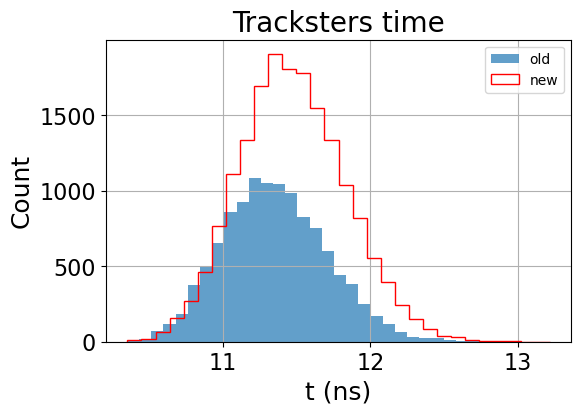

In [20]:
plt.figure(dpi=100)
plt.hist(ak.flatten(reco_CALO_time[reco_CALO_time>-99]), bins=30, label='old', alpha=.7)
plt.hist(ak.flatten(new_bt), bins=30, label='new', color='r', histtype='step')
plt.grid()
plt.legend()
plt.title('Tracksters time')
plt.xlabel('t (ns)', size=18)
plt.ylabel('Count', size=18)
plt.show()

## Plot the times

In [54]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,4))
fig.suptitle('SimTracksters from CaloParticle', size=18, y=1.05)

subplot(axs[0], CALO_time, title='HGCAL_time')
axs[0].set_title('HGCAL_time')
subplot(axs[1], ETL_time, title='MTD_time')
#subplot(axs[0], CP_boundary_time, title='boundary_time')

for ax in axs.flat:
    ax.set_xlabel('time (ns)', fontsize = 16.0)    
    ax.set_ylabel('Counts', fontsize = 16.0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Visual representation

In [53]:
%matplotlib widget
eid = 2

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("z (cm)")
ax1.set_zlabel("y (cm)")

ax1.set_xlim(ak.min(vx[eid]), ak.max(vx[eid]))
ax1.set_zlim(ak.min(vy[eid]), ak.max(vy[eid]))
ax1.set_ylim(ak.min(vz[eid]), ak.max(vz[eid]))

for x, y, z, e in zip(vx[eid], vy[eid], vz[eid], ve[eid]):
    ax1.scatter(x, z, y, s=8*e)

ax1.set_title(f"SimTrackster layer-clusters ({len(vx[eid])} Trackster)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
import matplotlib as mpl
cmap = mpl.cm.get_cmap('gist_rainbow')

In [26]:
%matplotlib widget
eid=0

C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("z (cm)")
ax1.set_zlabel("y (cm)")

# ax1.set_xlim(ak.min(vx[eid]), ak.max(vx[eid]))
# ax1.set_zlim(ak.min(vy[eid]), ak.max(vy[eid]))
# ax1.set_ylim(ak.min(vz[eid]), ak.max(vz[eid]))

x = ak.flatten(vx[vt>-99.][eid])
y = ak.flatten(vy[vt>-99.][eid])
z = ak.flatten(vz[vt>-99.][eid])
e = ak.flatten(ve[vt>-99.][eid])
t = ak.flatten(vt[vt>-99.][eid])

x = vx[vt>-99.][eid][tr_id]
y = vy[vt>-99.][eid][tr_id]
z = vz[vt>-99.][eid][tr_id]
e = ve[vt>-99.][eid][tr_id]
t = vt[vt>-99.][eid][tr_id]

img = ax1.scatter(x, z, y, s=20*e, alpha=0.5, c=t, cmap=mpl.cm.get_cmap('gist_rainbow'))

tempi = np.linspace(min(t), max(t), 4)

fig.colorbar(img, location='left', ticks=tempi, format='%0.2f',fraction=0.03, pad=0.04)
ax1.set_title(f"RecoTrackster layer-clusters with time (ns)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Calculate time along skeleton

In [20]:
def create_tr_skeletons(vx, vy, vz, ve, vt, vi, vm, bx, by, bz, be, bt, ev, tr_id, DST_THR=2.5, bubble_size=10, 
                                   NEIGHBOUR_THR=30, ENERGY_RATIO_THR=0.01, MIN_EDGE_LEN=1, PCA_NEIGHBOUR_THR=1, 
                                  secondary_edges = False):
    # Project the points on pca
    edges, nodes = set(), set()
    covered_nodes = set()
    covered_node_idx = []
    times = []
  
    vxt = vx[ev][tr_id]
    vyt = vy[ev][tr_id]
    vzt = vz[ev][tr_id]
    vet = ve[ev][tr_id]
    vtt = vt[ev][tr_id]
    #vit = vi[ev][tr_id]

    bxt = bx[ev][tr_id]
    byt = by[ev][tr_id]
    bzt = bz[ev][tr_id]
    bet = be[ev][tr_id]
    btt = bt[ev][tr_id]
    # Get distances between the LCs
    dist_matrix = distance_matrix(vxt, vyt, vzt)
    # Calculate PCA
    pca = WPCA(n_components=3)    
    positions = np.array((vxt, vyt, vzt)).T

    vet_array = np.array(vet).reshape(-1,1)
    vet_array = np.tile(vet_array,(1, 3))

    pca.fit(positions, weights = vet_array)
    component = pca.components_[0]
    
    # Barycenter
    b_coord = np.array([bxt, byt, bzt])
    edges.add((tuple(b_coord), tuple(b_coord)))
    nodes.add(tuple(b_coord))
    times.append(np.array([bxt, byt, bzt, btt]))
    ax.scatter(bxt, byt, bzt, s=10, c="red", label=f"{len(vet)} LC: {sum(vet):.2f} GeV")
    if not np.isnan(btt):
        ax.text(bxt, byt, bzt, '%.3f ns' % (btt), size=12)

    segment_end = np.array([bxt+component[0],
                            byt+component[1],
                            bzt+component[2]])

    data = [[x,y,z,e,i,j] for x,y,z,e,i,j in zip(vxt, vyt, vzt, vet, vtt, range(len(vxt)))]
    # sorted by energy
    data = sorted(data, key=lambda a: -a[3])

    # project each LC to the principal component
    min_p, max_p = b_coord, b_coord
    max_en = max(vet)
    num_lc_above_th = len(np.array(vxt)[np.array(vet) > 2*ENERGY_RATIO_THR*max_en])
    
    small_trackster = False
    if max_en < 1 or num_lc_above_th < 5:
        # If maximum energy of the LCs is lower than 2 GeV or number of layer clusters with at least a ENERGY_RATIO_THR of the maximum energy is less than 5
        small_trackster = True
        print("Small trackster")

    min_point = np.zeros(4)
    max_point = np.zeros(4)
    # try create main edges
    
    for x,y,z,e,t,j in data:
        # plot times
        #if i > -80:
        #    ax.text(x, y, z, '%.3f ns' % (i), size=12) #+ (x**2+y**2+z**2)**0.5/C
        
        point = np.array([x, y, z, t])
        dist, closest_point = project_lc_to_pca(point[:3], b_coord, segment_end)
        
        if e/max_en > ENERGY_RATIO_THR and dist < PCA_NEIGHBOUR_THR:
            # limiting the PCA length
            z_cl = closest_point[2]
            if z_cl > 0:
                if min_p[2] > z_cl and point[3]>-99:
                    min_p = closest_point
                    min_point = point

                if max_p[2] < z_cl:
                    max_p = closest_point  
                    max_point = point  
            else:
                if min_p[2] > z_cl:
                    min_p = closest_point
                    min_point = point
                if max_p[2] < z_cl and point[3]>-99:
                    max_p = closest_point  
                    max_point = point  
        
    if np.linalg.norm(min_p-max_p) > 0.5:
    
        if not np.allclose(min_p, b_coord, atol=0.1):
            edges.add((tuple(min_p), tuple(b_coord)))
            nodes.add(tuple(min_p))
            times.append(min_point)
            ax.plot([bxt, min_p[0]], [byt, min_p[1]], [bzt, min_p[2]], c='red')    

        if not np.allclose(max_p, b_coord, atol=0.1):
            edges.add((tuple(max_p), tuple(b_coord)))
            nodes.add(tuple(max_p))
            times.append(max_point)
            ax.plot([bxt, max_p[0]], [byt, max_p[1]], [bzt, max_p[2]], c='green')
    else:
        min_p, max_p = b_coord, b_coord
        min_point[:3], max_point[:3] = b_coord, b_coord
        min_point[3], max_point[3] = btt, btt
        
    print('times of the nearest LCs: {:.3f} ns, {:.3f} ns'.format(min_point[3], max_point[3]))
    ax.scatter(min_point[0], min_point[1], min_point[2], s=20, alpha=0.8, c="r", zorder=-5)   
    ax.scatter(max_point[0], max_point[1], max_point[2], s=20, alpha=0.8, c="r", zorder=-5)
    ax.text(min_point[0], min_point[1], min_point[2], '%.3f ns' % (min_point[3]), size=12)   
    ax.text(max_point[0], max_point[1], max_point[2], '%.3f ns' % (max_point[3]), size=12)
    
    # speed of the shower
    min_speed = np.linalg.norm(min_point[:3] - b_coord) / abs(min_point[3] - btt)
    max_speed = np.linalg.norm(max_point[:3] - b_coord) / abs(max_point[3] - btt)
    print('speed of shower along PCA segments: {:.3f} cm/ns, {:.3f} cm/ns'.format(min_speed, max_speed))
    speed = np.linalg.norm(max_point[:3] - min_point[:3]) / abs(max_point[3] - min_point[3])
    print('speed of shower: {:.3f} cm/ns'.format(speed))


    #Build secondary edges
    for x,y,z,e,i,j in data:
        
        if e / max_en > ENERGY_RATIO_THR:
            # and not covered by any edge
            point = np.array([x, y, z, i])
            min_dist, min_edge, closest_point_edge, closest_endpoint =  find_dist_to_closest_edge_set(point[:3], edges)
            #print(min_dist)
            
            if min_dist < DST_THR:
                # LC covered by some edge already
                ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="green", zorder=-5)
                covered_nodes.add((x, y, z))
                covered_node_idx.append(j)  
                continue
            else:
                ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="black", zorder=-5)
                pass

            if not small_trackster and secondary_edges:
                # find neares higher
                # go through all points, if the point is within the Neighbour_threshold
                distances = dist_matrix[j]
                indices = np.argsort(distances)

                for idx in indices:

                    if idx in covered_node_idx and distances[idx] < NEIGHBOUR_THR and vet[idx] > e and abs(vzt[idx]) < abs(z):
                        # found the nearest higher
                        # create an edge - to projection of the nearest higher to the pca
                        #edges[(idx, j)] = (np.array([vxt[idx], vyt[idx], vzt[idx]]), point)
                        ax.plot([vxt[idx], x], [vyt[idx], y], [vzt[idx], z], c='blue')
                        nearest_higher = np.array([vxt[idx], vyt[idx], vzt[idx]])
                        
                        # TODO: check that it lies on the axis!!!!!!!!!!!!!!!
                        dist, closest_point = project_lc_to_pca(nearest_higher, b_coord, segment_end)

                        if not np.allclose(closest_point, point[:3], atol=0.1):
                            edges.add((tuple(closest_point), tuple(point[:3])))
                            nodes.add(tuple(closest_point))
                            nodes.add(tuple(point[:3]))
                            times.append(point)
                        ax.plot([closest_point[0], x], [closest_point[1], y], [closest_point[2], z], c='blue')

                        break
        else:
            # if low energy
            pass
            ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="blue", zorder=-5)
    
    edges.remove((tuple(b_coord), tuple(b_coord)))
    set_axes_equal(ax)
    return edges, nodes, covered_node_idx, times

In [173]:
%matplotlib widget
eid   = 1
# create internal edges per each trackster
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Reconstruction of an electron\nLayer Clusters")
ax.set(xlabel="x (cm)", ylabel="y (cm)", zlabel="z (cm)")
all_event_edges, all_event_nodes, covered_node_idxs, all_event_times = [], [], [], []
for tr_id in range(len(vx[eid])):    
    #plt.style.use('default')
    internal_trackster_edges, internal_trackster_nodes, covered_node_idx, times = create_tr_skeletons(vx, vy, vz, ve, vt, vi, vm, 
                                                                                                                 bx, by, bz, be, CALO_time, ev=eid,
                                                                                                          tr_id=tr_id, bubble_size=100, 
                                                                                                          secondary_edges = False)
    #print(internal_trackster_edges)
    all_event_edges.append(internal_trackster_edges)
    all_event_nodes.append(internal_trackster_nodes)
    covered_node_idxs.append(covered_node_idx)
    all_event_times.append(times)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

times of the nearest LCs: 0.000 ns, 14.667 ns
speed of particle along PCA segments: 29.896 cm/ns, 29.988 cm/ns
speed of shower: 29.899 cm/ns
times of the nearest LCs: 0.000 ns, 14.107 ns
speed of particle along PCA segments: 29.934 cm/ns, 32.194 cm/ns
speed of shower: 30.065 cm/ns
times of the nearest LCs: 12.213 ns, -99.000 ns
speed of particle along PCA segments: 32.760 cm/ns, 0.402 cm/ns
speed of shower: 0.579 cm/ns
Small trackster
times of the nearest LCs: nan ns, nan ns
speed of particle along PCA segments: nan cm/ns, nan cm/ns
speed of shower: nan cm/ns
Small trackster
times of the nearest LCs: nan ns, nan ns
speed of particle along PCA segments: nan cm/ns, nan cm/ns
speed of shower: nan cm/ns
times of the nearest LCs: 13.330 ns, -99.000 ns
speed of particle along PCA segments: 29.988 cm/ns, 0.465 cm/ns
speed of shower: 0.679 cm/ns
Small trackster
times of the nearest LCs: nan ns, nan ns
speed of particle along PCA segments: nan cm/ns, nan cm/ns
speed of shower: nan cm/ns
Small t

/tmp/ipykernel_904/2477911350.py:118: RuntimeWarning: invalid value encountered in double_scalars
  min_speed = np.linalg.norm(min_point[:3] - b_coord) / abs(min_point[3] - btt)
/tmp/ipykernel_904/2477911350.py:119: RuntimeWarning: invalid value encountered in double_scalars
  max_speed = np.linalg.norm(max_point[:3] - b_coord) / abs(max_point[3] - btt)
/tmp/ipykernel_904/2477911350.py:121: RuntimeWarning: invalid value encountered in double_scalars
  speed = np.linalg.norm(max_point[:3] - min_point[:3]) / abs(max_point[3] - min_point[3])


## propagate time to ETL

In [16]:
def nodes_pca(vx, vy, vz, ve, vt, vi, vm, bx, by, bz, be, bt, ev, tr_id,
                     ENERGY_RATIO_THR=0.01, PCA_NEIGHBOUR_THR=1, verbosity=True):
    # Project the points on pca
    nodes = []

    vxt = vx[ev][tr_id]
    vyt = vy[ev][tr_id]
    vzt = vz[ev][tr_id]
    vet = ve[ev][tr_id]
    vtt = vt[ev][tr_id]

    bxt = bx[ev][tr_id]
    byt = by[ev][tr_id]
    bzt = bz[ev][tr_id]
    bet = be[ev][tr_id]
    btt = bt[ev][tr_id]
    
    if len(vet)==0:
        b_coord = np.array([bxt, byt, bzt])
        nodes.append(np.array([bxt, byt, bzt, btt]))
        return nodes
    
    # Get distances between the LCs
    dist_matrix = distance_matrix(vxt, vyt, vzt)
    # Calculate PCA
    pca = WPCA(n_components=3)    
    positions = np.array((vxt, vyt, vzt)).T

    vet_array = np.array(vet).reshape(-1,1)
    vet_array = np.tile(vet_array,(1, 3))

    pca.fit(positions, weights = vet_array)
    component = pca.components_[0]
    
    # Barycenter
    b_coord = np.array([bxt, byt, bzt])
    nodes.append(np.array([bxt, byt, bzt, btt]))
  
    segment_end = np.array([bxt+component[0],
                            byt+component[1],
                            bzt+component[2]])

    data = [[x,y,z,e,i,j] for x,y,z,e,i,j in zip(vxt, vyt, vzt, vet, vtt, range(len(vxt)))]
    # sorted by energy
    data = sorted(data, key=lambda a: -a[3])

    # project each LC to the principal component
    min_p, max_p = b_coord, b_coord
    max_en = max(vet)
    num_lc_above_th = len(np.array(vxt)[np.array(vet) > 2*ENERGY_RATIO_THR*max_en])
    
    small_trackster = False
    if (max_en < 1 or num_lc_above_th < 5) and verbosity:
        # If maximum energy of the LCs is lower than 2 GeV or number of layer clusters with at least a ENERGY_RATIO_THR of the maximum energy is less than 5
        small_trackster = True
        print("Small trackster")
        #return nodes

    min_point = np.zeros(4)
    max_point = np.zeros(4)
    # try create main edges
    
    for x,y,z,e,i,j in data:

        point = np.array([x, y, z, i])
        dist, closest_point = project_lc_to_pca(point[:3], b_coord, segment_end)
        
        if e/max_en > ENERGY_RATIO_THR and dist < PCA_NEIGHBOUR_THR:
            # limiting the PCA length
            z_cl = closest_point[2]
            if z_cl > 0:
                if min_p[2] > z_cl and point[3]>-80:
                    min_p = closest_point
                    min_point = point

                if max_p[2] < z_cl:
                    max_p = closest_point  
                    max_point = point  
            else:
                if min_p[2] > z_cl:
                    min_p = closest_point
                    min_point = point
                if max_p[2] < z_cl and point[3]>-80:
                    max_p = closest_point  
                    max_point = point
        
    if np.linalg.norm(min_p-max_p) > 0.5:
    
        if not np.allclose(min_p, b_coord, atol=0.1):
            nodes.append(min_point)

        if not np.allclose(max_p, b_coord, atol=0.1):
            nodes.append(max_point)
    else:
        min_p, max_p = b_coord, b_coord
        min_point[:3], max_point[:3] = b_coord, b_coord
        min_point[3], max_point[3] = btt, btt
    
    return nodes

In [77]:
np.argmax(reco_be[9])

6

In [225]:
%matplotlib widget
eid = 2
tk  = 4

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Reconstruction of two CloseBy electrons")
ax.set(xlabel="x (cm)", ylabel="z (cm)", zlabel="y (cm)")

Xmin = ak.min((ETL_vx[eid], vx[eid]))
Xmax = ak.max((ETL_vx[eid], vx[eid]))
Ymin = ak.min((ETL_vy[eid], vy[eid]))
Ymax = ak.max((ETL_vy[eid], vy[eid]))

ax.set_xlim(Xmin, Xmax)
ax.set_zlim(Ymin, Ymax)
# ax.set_ylim(ak.min((Z_boundary-10, ak.min(CP_vz[eid]))), ak.max((Z_boundary+10, ak.max(CP_vz[eid]))))

# plot the trackster
for x, y, z, e in zip(vx[eid][tk], vy[eid][tk], vz[eid][tk], ve[eid][tk]):
    ax.scatter(x, z, y, s=8*e, c='dodgerblue', alpha=0.5)

# sort the nodes wrt to time
all_event_nodes = []
for tr_id in range(len(bx[eid])): 
    nodes = nodes_pca(vx, vy, vz, ve, vt, vi, vm,
                    #vx[vt>-99], vy[vt>-99], vz[vt>-99], ve[vt>-99], vt[vt>-99], vi[vt>-99], vm,
                                     bx, by, bz, be, CALO_time, ev=eid,
                                     tr_id=tr_id, verbosity= False)
    nodes = np.array(sorted(nodes,key=lambda x: x[2])) 
    all_event_nodes.append(nodes)

# plot the PCA
for nn, nodes in enumerate(all_event_nodes):
    #nodes = np.array(sorted(nodes,key=lambda x: x[2]))
    for i, n in enumerate(nodes):
        if nn == tk:
            ax.scatter(n[0], n[2], n[1], s=10, c='red')
            if not np.isnan(n[3]) and (n[3]>-99):
                ax.text(n[0], n[2], n[1], '%.3f ns' % (n[3]), size = 12)
            if i+1 != len(nodes):
                ax.plot([n[0], nodes[i+1][0]], [n[2], nodes[i+1][2]], [n[1], nodes[i+1][1]], c='red')

#TODO 
track_ids =  []
for j in range(NTracksters[eid]):
    track_ids.append(trackster_to_track(eid, j, TICLtracksters, TICLtracks))
    
# propagate time from PCA to ETL
for i, nodes in enumerate(all_event_nodes):
    if i == tk:
        nodi = nodes #np.array(sorted(nodes, key=lambda x: x[2]))
        T = (np.sign(vz[eid][i][0])*ak.min(abs(ETL_vz[eid])) - nodi[0][2])/(nodi[-1][2] - nodi[0][2])

        projection = nodi[0][:3] + T*(nodi[-1][:3] - nodi[0][:3])
        ax.scatter(projection[0], projection[2], projection[1], s=15, c='green')
        ax.plot([projection[0], nodi[0][0]], [projection[2], nodi[0][2]], [projection[1], nodi[0][1]], c='green', linestyle='dashed')

        d2pca = np.linalg.norm(nodi[0][:3])
        v2pca = C #* ETL_beta[eid][track_ids[i]]
        dproj2pca = np.linalg.norm(nodi[0][:3] - projection) # from the projection to the beginning of the PCA
        tproj2pca = dproj2pca / v2pca
        time2proj = nodi[0][3] - tproj2pca 
        ax.text(projection[0], projection[2], projection[1], 'Prop: %.3f ns\n' % (time2proj), size = 10)

#ETL clusters
for i in range(len(ETL_vx[eid])):
    if ETL_vz[eid][i] * vz[eid][tk][0] > 0: #ETL_time[eid][i]>0:
        ax.scatter(ETL_vx[eid][i], ETL_vz[eid][i], ETL_vy[eid][i], marker='o', s=20, c='blue')    
       # ax.text(ETL_vx[eid][i], ETL_vz[eid][i], ETL_vy[eid][i], '%.3f ns' % (ETL_time[eid][i]), size = 12, c='blue')
print(ETL_tmtd[eid][0])
    
# draw ETL
a = (Xmin, Ymin, np.sign(vz[eid][tk][0])*ak.min(abs(ETL_vz[eid])))  # p1
b = (Xmax, Ymax, np.sign(vz[eid][tk][0])*ak.max(abs(ETL_vz[eid])))  # p2
plot_cube(a, b, ax)

#set_axes_equal(ax)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

track  2  ev  2  tk  4
0.0


In [ ]:
%matplotlib widget
eid = 3
tk  = 1

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Reconstruction of two CloseBy electrons")
ax.set(xlabel="x (cm)", ylabel="z (cm)", zlabel="y (cm)")

Xmin = ak.min((ETL_vx[eid], vx[eid]))
Xmax = ak.max((ETL_vx[eid], vx[eid]))
Ymin = ak.min((ETL_vy[eid], vy[eid]))
Ymax = ak.max((ETL_vy[eid], vy[eid]))

ax.set_xlim(Xmin, Xmax)
ax.set_zlim(Ymin, Ymax)
# ax.set_ylim(ak.min((Z_boundary-10, ak.min(CP_vz[eid]))), ak.max((Z_boundary+10, ak.max(CP_vz[eid]))))

for tk in range(12):
    if vz[eid][tk][0]<0:
        continue
    # plot the trackster
    for x, y, z, e in zip(vx[eid][tk], vy[eid][tk], vz[eid][tk], ve[eid][tk]):
        ax.scatter(x, z, y, s=8*e, c='dodgerblue', alpha=0.5)

    # sort the nodes wrt to time
    all_event_nodes = []
    for tr_id in range(len(bx[eid])): 
        nodes = nodes_pca(vx, vy, vz, ve, vt, vi, vm,
                        #vx[vt>-99], vy[vt>-99], vz[vt>-99], ve[vt>-99], vt[vt>-99], vi[vt>-99], vm,
                                         bx, by, bz, be, CALO_time, ev=eid,
                                         tr_id=tr_id, verbosity= False)
        nodes = np.array(sorted(nodes,key=lambda x: x[2])) 
        all_event_nodes.append(nodes)

    # plot the PCA
    for nn, nodes in enumerate(all_event_nodes):
        #nodes = np.array(sorted(nodes,key=lambda x: x[2]))
        for i, n in enumerate(nodes):
            if nn == tk:
                ax.scatter(n[0], n[2], n[1], s=10, c='red')
                if not np.isnan(n[3]) and (n[3]>-99):
                    ax.text(n[0], n[2], n[1], '%.3f ns' % (n[3]), size = 12)
                if i+1 != len(nodes):
                    ax.plot([n[0], nodes[i+1][0]], [n[2], nodes[i+1][2]], [n[1], nodes[i+1][1]], c='red')

    #TODO 
    track_ids =  []
    for j in range(NTracksters[eid]):
        track_ids.append(trackster_to_track(eid, j, TICLtracksters, TICLtracks))

    # propagate time from PCA to ETL
    for i, nodes in enumerate(all_event_nodes):
        if i == tk:
            nodi = nodes #np.array(sorted(nodes, key=lambda x: x[2]))
            T = (np.sign(vz[eid][i][0])*ak.min(abs(ETL_vz[eid])) - nodi[0][2])/(nodi[-1][2] - nodi[0][2])

            projection = nodi[0][:3] + T*(nodi[-1][:3] - nodi[0][:3])
            ax.scatter(projection[0], projection[2], projection[1], s=15, c='green')
            ax.plot([projection[0], nodi[0][0]], [projection[2], nodi[0][2]], [projection[1], nodi[0][1]], c='green', linestyle='dashed')

            d2pca = np.linalg.norm(nodi[0][:3])
            v2pca = C #* ETL_beta[eid][track_ids[i]]
            dproj2pca = np.linalg.norm(nodi[0][:3] - projection) # from the projection to the beginning of the PCA
            tproj2pca = dproj2pca / v2pca
            time2proj = nodi[0][3] - tproj2pca 
            ax.text(projection[0], projection[2], projection[1], 'Prop: %.3f ns\n' % (time2proj), size = 10)

#ETL clusters
for i in range(len(ETL_vx[eid])):
    if ETL_vz[eid][i] * vz[eid][tk][0] > 0: #ETL_time[eid][i]>0:
        ax.scatter(ETL_vx[eid][i], ETL_vz[eid][i], ETL_vy[eid][i], marker='o', s=20, c='blue')    
       # ax.text(ETL_vx[eid][i], ETL_vz[eid][i], ETL_vy[eid][i], '%.3f ns' % (ETL_time[eid][i]), size = 12, c='blue')
print(ETL_tmtd[eid][0])
    
# draw ETL
a = (Xmin, Ymin, np.sign(vz[eid][tk][0])*ak.min(abs(ETL_vz[eid])))  # p1
b = (Xmax, Ymax, np.sign(vz[eid][tk][0])*ak.max(abs(ETL_vz[eid])))  # p2
plot_cube(a, b, ax)

#set_axes_equal(ax)
plt.show()

In [72]:
for eid in events:
    print(f'--- Event {eid} ---')
    all_event_nodes = []
    for tr_id in range(len(bx[eid])): 
        nodes = nodes_pca(vx[vt>-99], vy[vt>-99], vz[vt>-99], ve[vt>-99], vt[vt>-99], vi[vt>-99], vm,
                          #vx, vy, vz, ve, vt, vi, vm,
                          bx, by, bz, be, CALO_time, ev=eid,
                          tr_id=tr_id, verbosity=False)
        nodes = np.array(sorted(nodes,key=lambda x: x[2])) 
        all_event_nodes.append(nodes)

    for i, nodes in enumerate(all_event_nodes):
        print(f'--- Trackster {i} ---')
        if (len(nodes)==1):
            #print('Small')
            continue
        # projection
        T = (ak.min(ETL_vz[eid]) - nodes[0][2])/(nodes[-1][2] - nodes[0][2])
        projection = nodes[0][:3] + T*(nodes[-1][:3] - nodes[0][:3])

        track_idx = trackster_to_track(eid, i, TICLtracksters, TICLtracks)

        v2pca = C * ETL_beta[eid][track_idx] if track_idx > 0 else C
        dproj2pca = np.linalg.norm(nodes[0][:3] - projection) # from the projection to the beginning of the PCA
        tproj2pca = dproj2pca / v2pca
        time2proj = nodes[0][3] - tproj2pca

        # check if there is a track linked
        if track_idx <0:
            #print('No track, try to find one')
            #loop su tMtd e se ce n'è uno compatibile linko a traccia --> compatibilità nello spazio??
            if abs(time2proj - ETL_tmtd[eid][0])<0.03: #0 SOLO QUI X' HO UNA PARTICELLA
                print(f'possible link between tMtd and trackster {i}')
            #else:
                #print('Not found')
                #continue

            #print('No ETL cluster, searching for one')
            #loop su ETL cluster, link se compat in time e space LOOP ANCHE SE C'é TRACCIA TODO (MAYBE?)
            etl = np.array([ETL_vx[eid], ETL_vy[eid], ETL_vz[eid], ETL_time[eid]]).T
            min_dist = 999
            min_time = 999
            for cl in etl:
                dist = np.linalg.norm(cl[:3] - projection)
                time = abs(cl[3] - time2proj)
                if dist < 1 and time < 0.03:
                    min_dist = dist
                    min_time = time
            if min_dist < 1 and min_time < 0.03:  #RELEASE CONSTRAINT TODO  
                print(f'Linked ETL cluster {cl} to trackster {i}')
        else:
            etl = ETL_tmtd[eid][track_idx]
            if abs(time2proj - etl)<0.03:
                print('Link track-trackster ok with time compatibility')
            else:
                print(f'Link track-trackster NOT ok with time compatibility for trackster {i} with time {time2proj} and track {track_idx} with time {ETL_tmtd[eid][0]}')

--- Event 0 ---
--- Trackster 0 ---
track  0  ev  0  tk  0
Link track-trackster NOT ok with time compatibility for trackster 0 with time nan and track 0 with time 10.121600151062012
--- Trackster 1 ---
track  0  ev  0  tk  1
Link track-trackster ok with time compatibility
--- Event 1 ---
--- Trackster 0 ---
track  0  ev  1  tk  0
Link track-trackster NOT ok with time compatibility for trackster 0 with time 10.511856380104124 and track 0 with time 10.423377990722656
--- Trackster 1 ---
--- Trackster 2 ---
--- Trackster 3 ---
--- Trackster 4 ---
--- Trackster 5 ---
--- Trackster 6 ---
--- Trackster 7 ---
--- Trackster 8 ---
--- Trackster 9 ---
track  0  ev  1  tk  9
Link track-trackster NOT ok with time compatibility for trackster 9 with time nan and track 0 with time 10.423377990722656
--- Trackster 10 ---
--- Trackster 11 ---
--- Event 2 ---
--- Trackster 0 ---
--- Trackster 1 ---
--- Event 3 ---
--- Trackster 0 ---
--- Trackster 1 ---
--- Trackster 2 ---
--- Trackster 3 ---
--- Tracks

In [ ]:
#nodes
if (len(nodes)==1):
    #print('Small')
    continue
# projection
T = (ak.min(ETL_vz[eid]) - nodes[0][2])/(nodes[-1][2] - nodes[0][2])
projection = nodes[0][:3] + T*(nodes[-1][:3] - nodes[0][:3])

track_idx = trackster_to_track(eid, i, TICLtracksters, TICLtracks)

v2pca = C * ETL_beta[eid][track_idx] if track_idx > 0 else C
dproj2pca = np.linalg.norm(nodes[0][:3] - projection) # from the projection to the beginning of the PCA
tproj2pca = dproj2pca / v2pca
time2proj = nodes[0][3] - tproj2pca

# check if there is a track linked
if track_idx <0:
    #loop su tMtd e se ce n'è uno compatibile linko a traccia --> compatibilità nello spazio??
    if abs(time2proj - ETL_tmtd[eid][0])<0.03: #0 SOLO QUI X' HO UNA PARTICELLA
        print(f'possible link between tMtd and trackster {i}')
    #else:
        #print('Not found')
        #continue

#     #print('No ETL cluster, searching for one')
#     #loop su ETL cluster, link se compat in time e space LOOP ANCHE SE C'é TRACCIA TODO (MAYBE?)
#     etl = np.array([ETL_vx[eid], ETL_vy[eid], ETL_vz[eid], ETL_time[eid]]).T
#     min_dist = 999
#     min_time = 999
#     for cl in etl:
#         dist = np.linalg.norm(cl[:3] - projection)
#         time = abs(cl[3] - time2proj)
#         if dist < 1 and time < 0.03:
#             min_dist = dist
#             min_time = time
#     if min_dist < 1 and min_time < 0.03:  #RELEASE CONSTRAINT TODO  
#         print(f'Linked ETL cluster {cl} to trackster {i}')
# else:
#     etl = ETL_tmtd[eid][track_idx]
#     if abs(time2proj - etl)<0.03:
#         print('Link track-trackster ok with time compatibility')
#     else:
#         print(f'Link track-trackster NOT ok with time compatibility for trackster {i} with time {time2proj} and track {track_idx} with time {ETL_tmtd[eid][0]}')

In [57]:
np.array(ETL_tmtd)

array([[10.1216  ],
       [10.423378],
       [10.212601],
       [10.0956  ],
       [10.470068],
       [10.138697],
       [10.418249],
       [10.368601],
       [10.411079],
       [ 9.852501]], dtype=float32)

In [102]:
# #TODO
# -keep/remove link tk-trk based on time compatibility
# -create new link tk-trk based on mtd